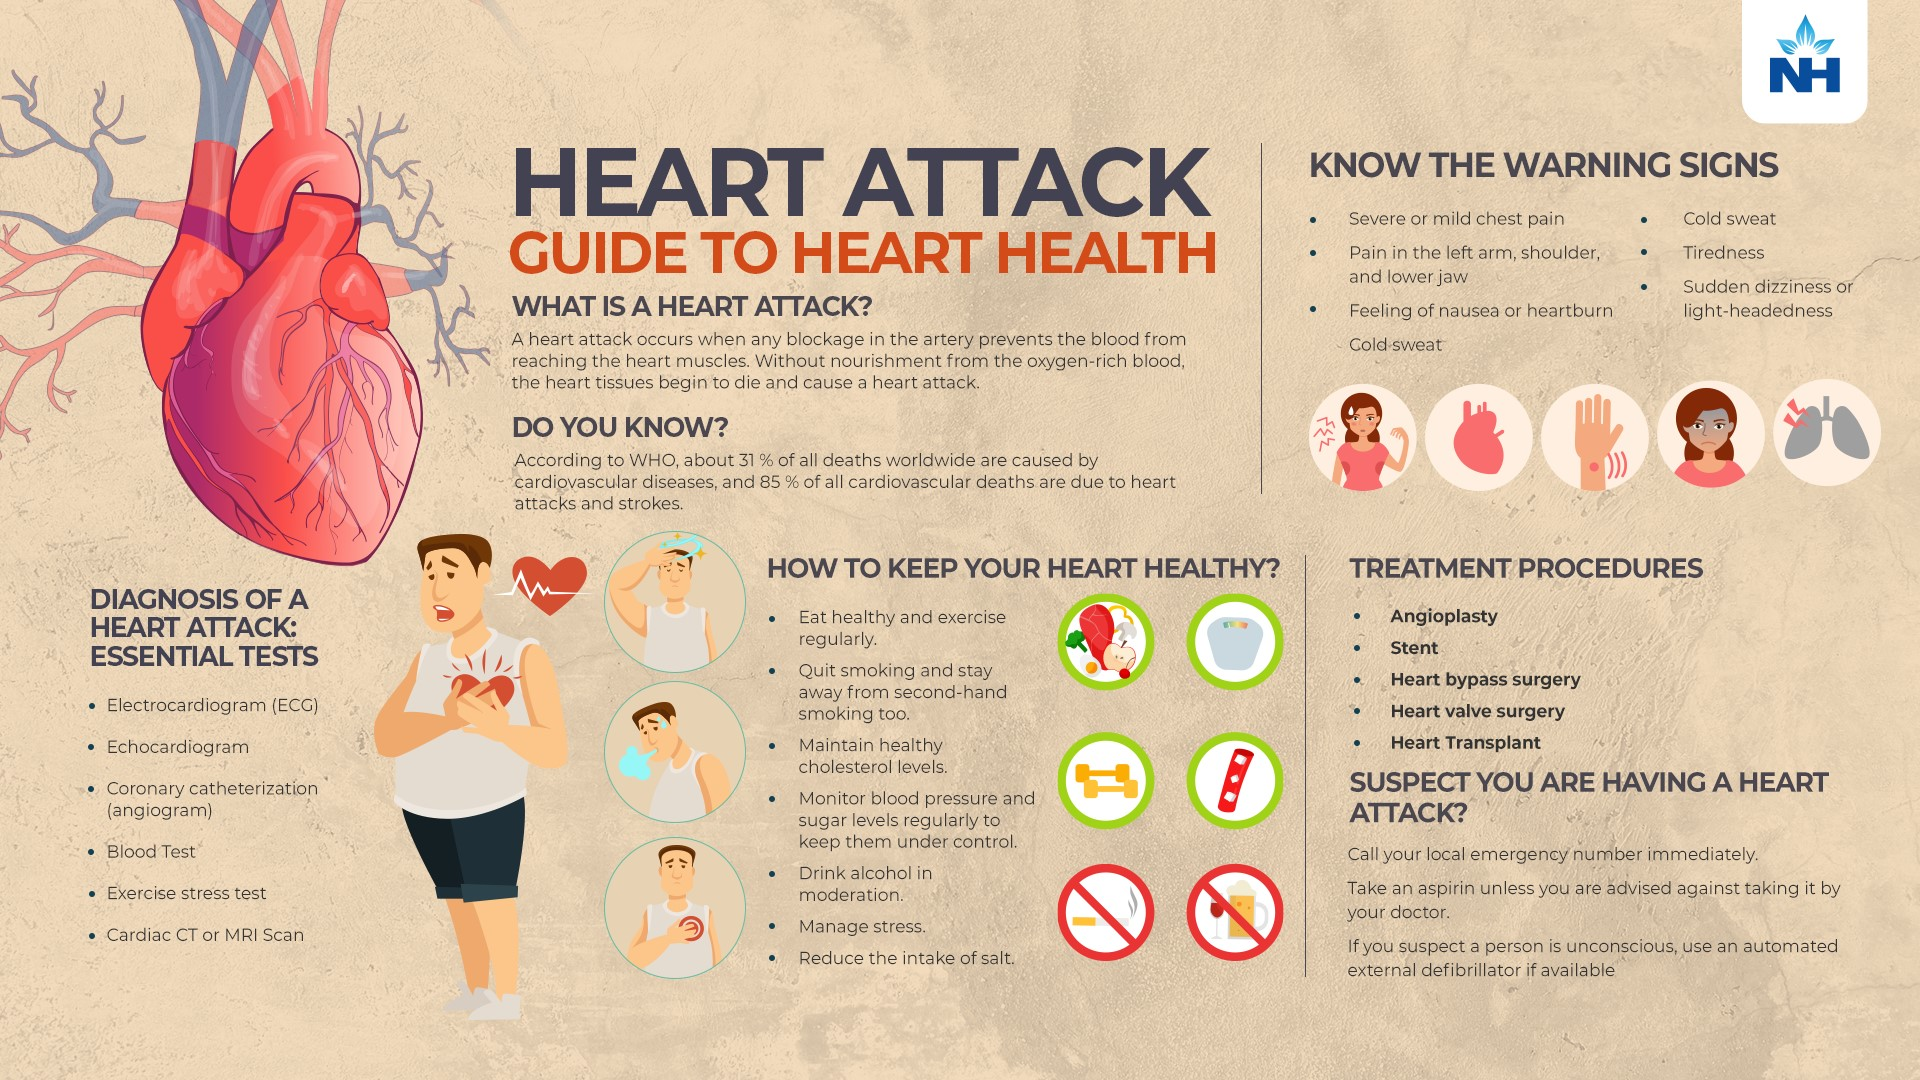

# Import Basic Libraries

In [1]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report,roc_auc_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Load the Dataset

In [2]:
haa = pd.read_csv('heart.csv')
haa

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Make a copy of Data

In [3]:
heart_df = haa.copy()

## About Variables in the Dataset

- age: The person’s age in years
- sex: The person’s sex (1 = male, 0 = female)
- cp: chest pain type
     - Value 1: typical angina
     - Value 2: atypical angina
     - Value 3: non-anginal pain
     - Value 4: asymptomatic
- trtbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
- chol: The person’s cholesterol measurement in mg/dl
- fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalachh: The person’s maximum heart rate achieved
- exng: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)
- slp: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping
- caa: The number of major vessels (0–3)
- thall: A blood disorder called thalassemia 
    - Value 0: NULL (dropped from the dataset previously
    - Value 1: fixed defect (no blood flow in some part of the heart)
    - Value 2: normal blood flow
    - Value 3: reversible defect (a blood flow is observed but it is not normal)
- output : 0: less chance of heart attack 1: more chance of heart attack

## Dataset Information

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- From dataset info, it is clear that there is no missing values in the dataset and also the datatype of all the variables are integer and float.

In [5]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Describe the Dataset

In [6]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Check Duplicate Data

In [7]:
heart_df.duplicated().sum()

1

In [8]:
heart_df.drop_duplicates(inplace=True)

In [9]:
heart_df.duplicated().sum()

0

# Exploratory Data Analysis(EDA)

## Univariate Analysis

In [10]:
heart_df['output'].describe()

count    302.000000
mean       0.543046
std        0.498970
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: output, dtype: float64

In [11]:
heart_df['output'].value_counts()

1    164
0    138
Name: output, dtype: int64

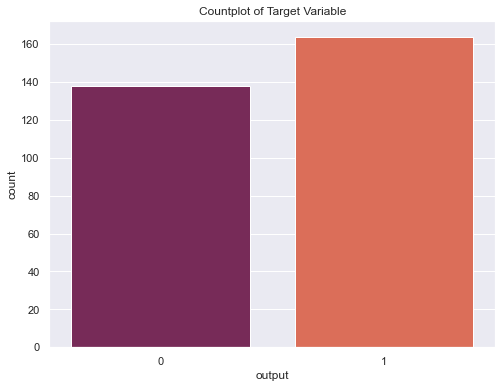

In [12]:
plt.figure(figsize=(8,6))

sns.countplot(heart_df['output'],palette='rocket')
plt.title('Countplot of Target Variable')
plt.show()

- 138 persons don't have Heart attack and 164 persons have Heart attack.
- It is a well balanced dataset, i.e, there is no imbalance in the target variable.

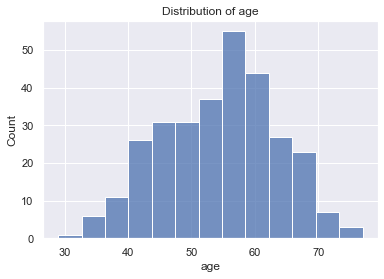

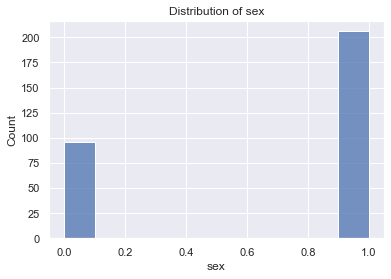

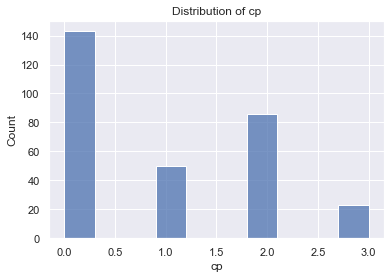

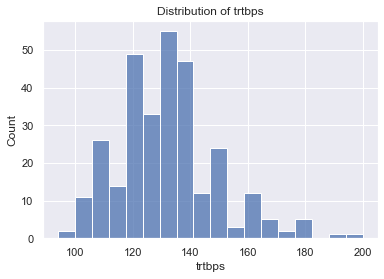

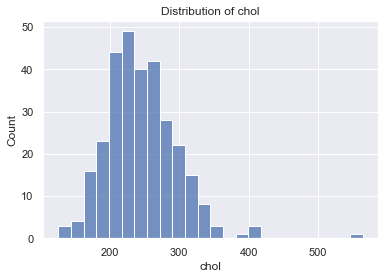

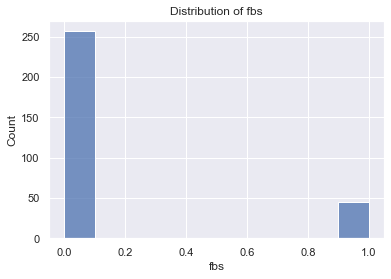

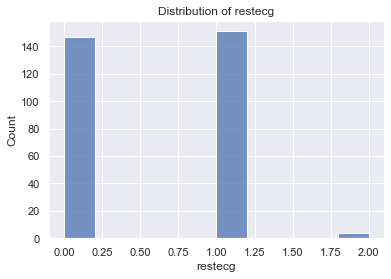

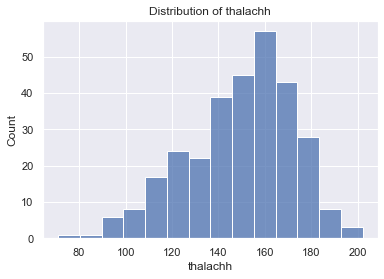

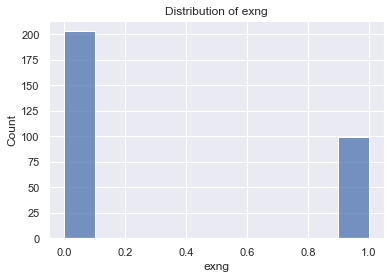

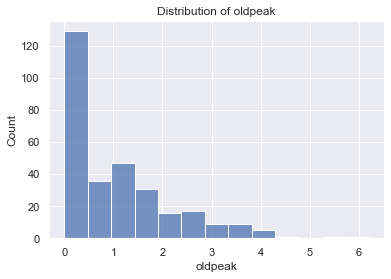

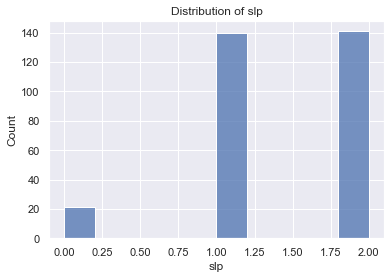

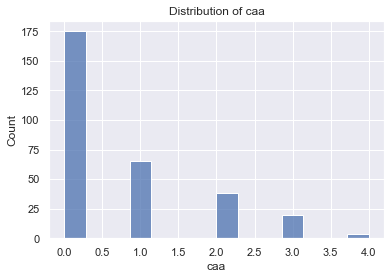

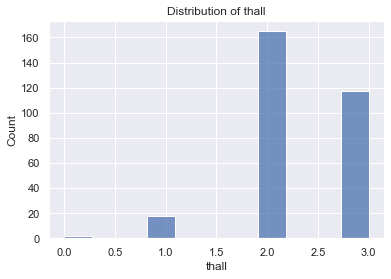

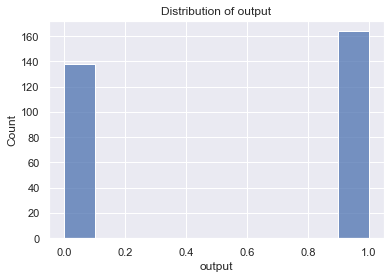

In [13]:
#plt.figure(figsize=(6,3))

for i in heart_df.columns:
    plt.title(f'Distribution of {i}')
    sns.histplot(x = i, data= heart_df)
    plt.show()

### Unique values in categorical variables

In [14]:
cat_var = ['sex','cp','fbs','restecg','exng','slp','caa','thall']

for i in cat_var:
    unique_val = heart_df[i].value_counts()
    print(i)
    print(unique_val)
    print('*'*20)

sex
1    206
0     96
Name: sex, dtype: int64
********************
cp
0    143
2     86
1     50
3     23
Name: cp, dtype: int64
********************
fbs
0    257
1     45
Name: fbs, dtype: int64
********************
restecg
1    151
0    147
2      4
Name: restecg, dtype: int64
********************
exng
0    203
1     99
Name: exng, dtype: int64
********************
slp
2    141
1    140
0     21
Name: slp, dtype: int64
********************
caa
0    175
1     65
2     38
3     20
4      4
Name: caa, dtype: int64
********************
thall
2    165
3    117
1     18
0      2
Name: thall, dtype: int64
********************


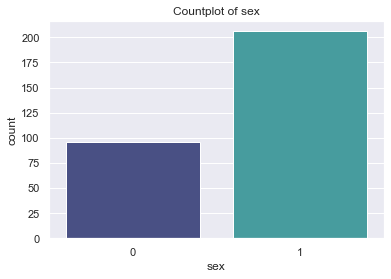

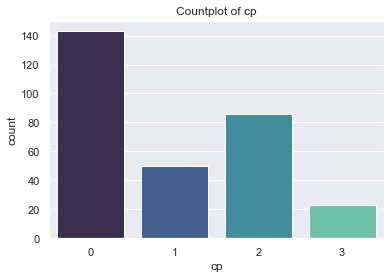

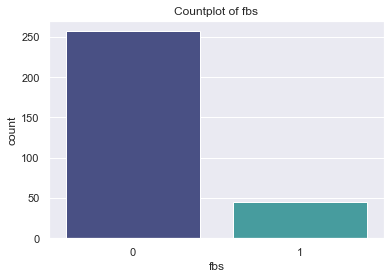

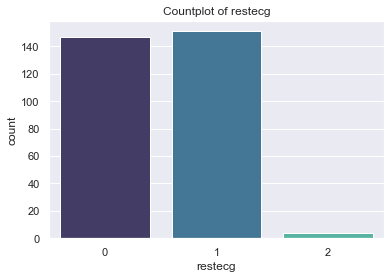

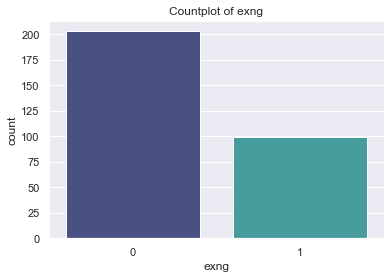

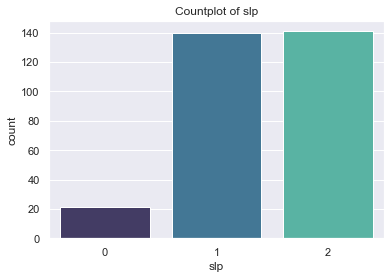

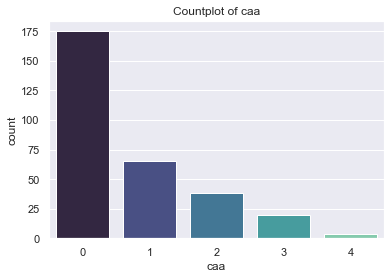

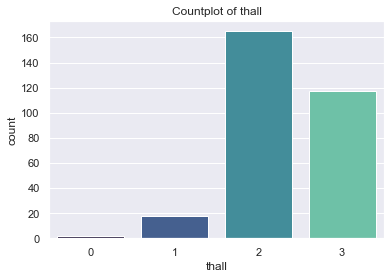

In [15]:
for i in cat_var:
    plt.title(f'Countplot of {i}')
    sns.countplot(x=i, data= heart_df, palette= 'mako')
    plt.show()

## Bivariate Analysis

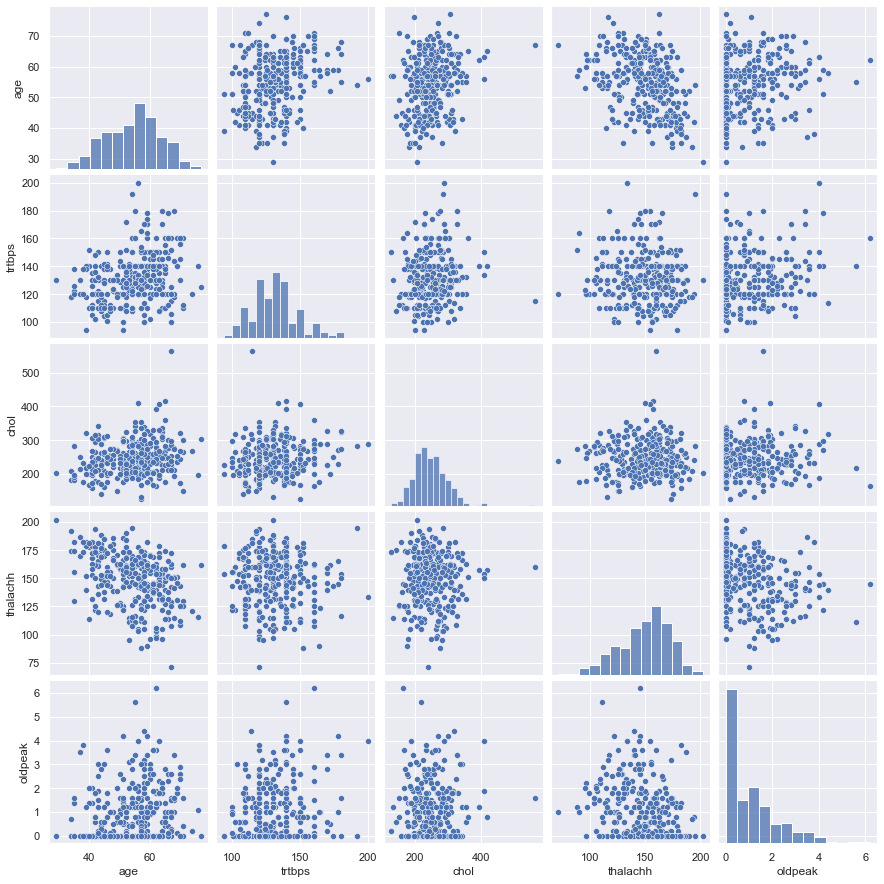

In [16]:
num_var = ['age','trtbps','chol','thalachh','oldpeak']

sns.pairplot(heart_df[num_var])
plt.show()

**Note:**
    
    - The Pair plot allows us to see both the distribution of a single variables and relationship between the two variables.
    - From the Scatter plot, we clearly see that the 'age' variable has 'positive' correlation with 'cholesterol' and 
    'negative' correlation with 'thalachh'.
    - 'trtbps' variable has 'positive' correlation with 'age' and 'negative' correlation with 'thalachh' variable.
    - 'chol' variable has 'positive' correlation with 'age' and 'trtbps' variables. There is no relationship with 
    other variables.
    - 'thalachh' has 'negative' correlation with 'age', other than that there is no relationship between other variables.
    - 'oldpeak' variable didn't have any relationship with other variables.

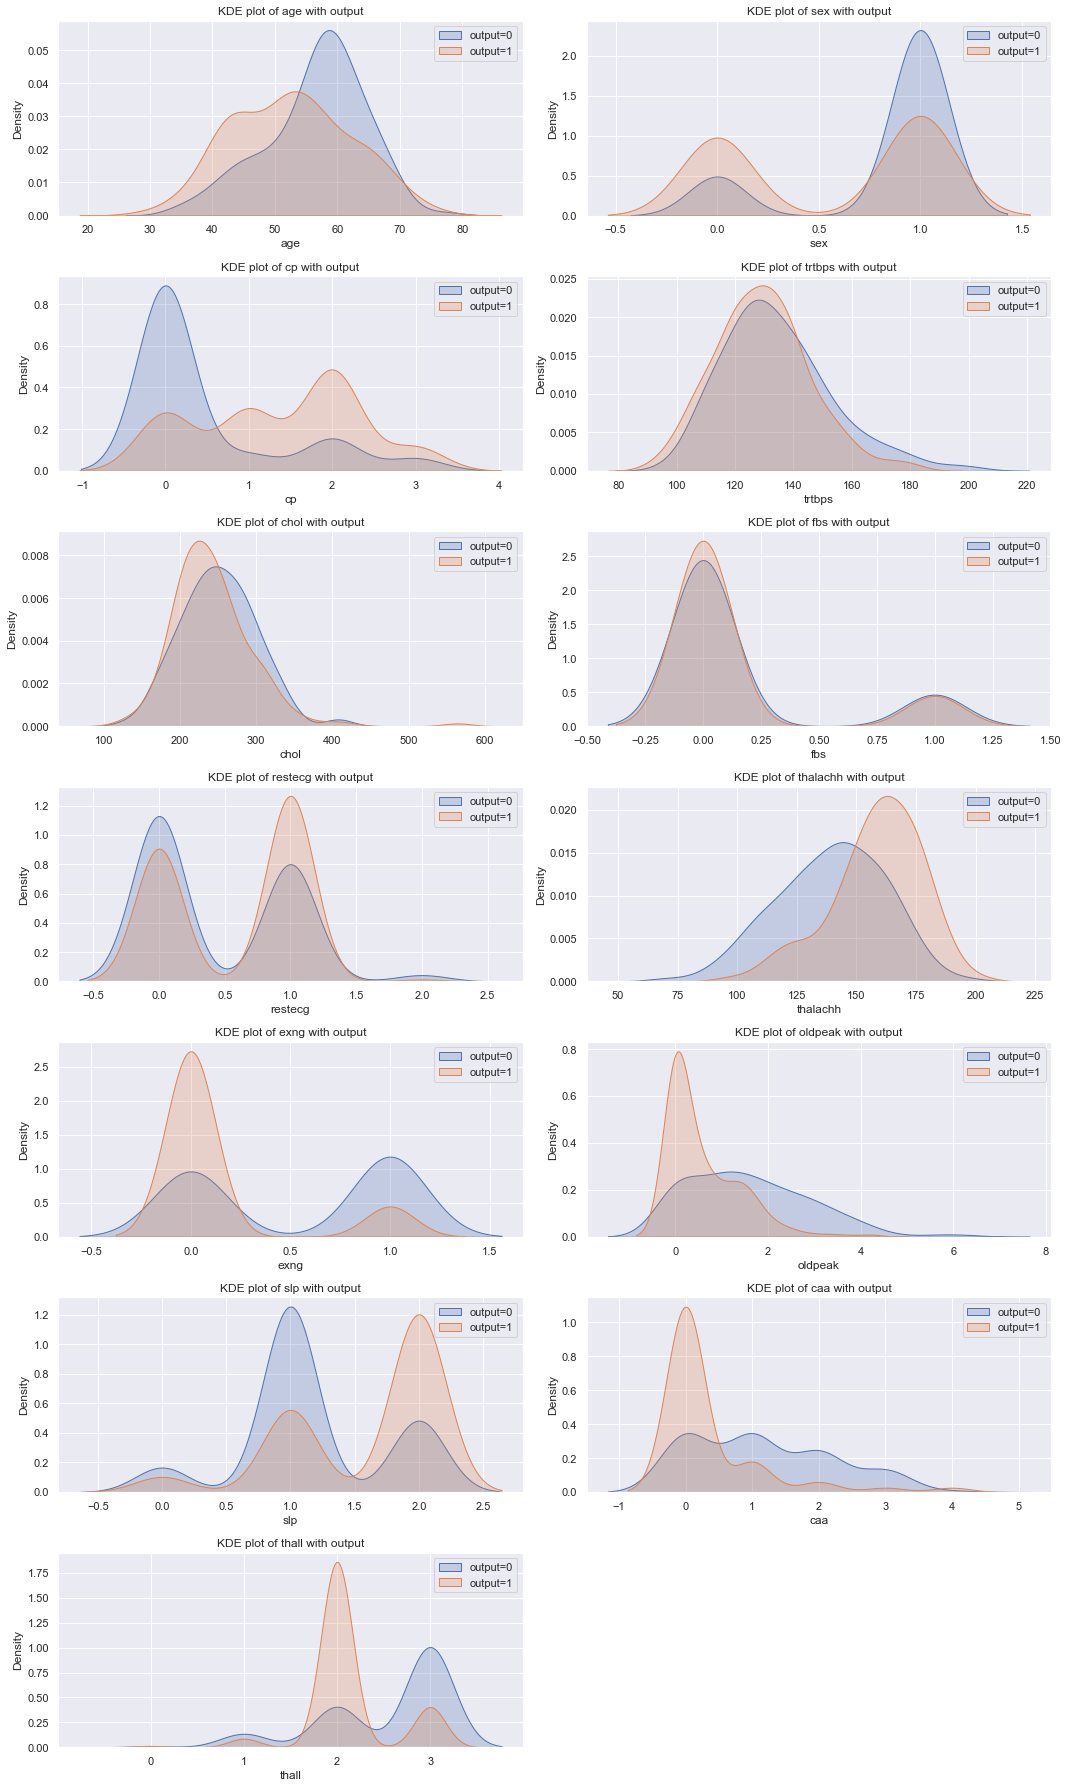

In [17]:
num_col = len(heart_df.columns) - 1
num_rows = (num_col + 1) // 2

plt.figure(figsize=(15,25))

for i,column in enumerate(heart_df.columns.drop('output')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=heart_df[heart_df['output'] == 0][column], label='output=0', fill=True)
    sns.kdeplot(data=heart_df[heart_df['output'] == 1][column], label='output=1', fill=True)
    plt.title(f'KDE plot of {column} with output')
    plt.legend()

plt.tight_layout()
plt.show()

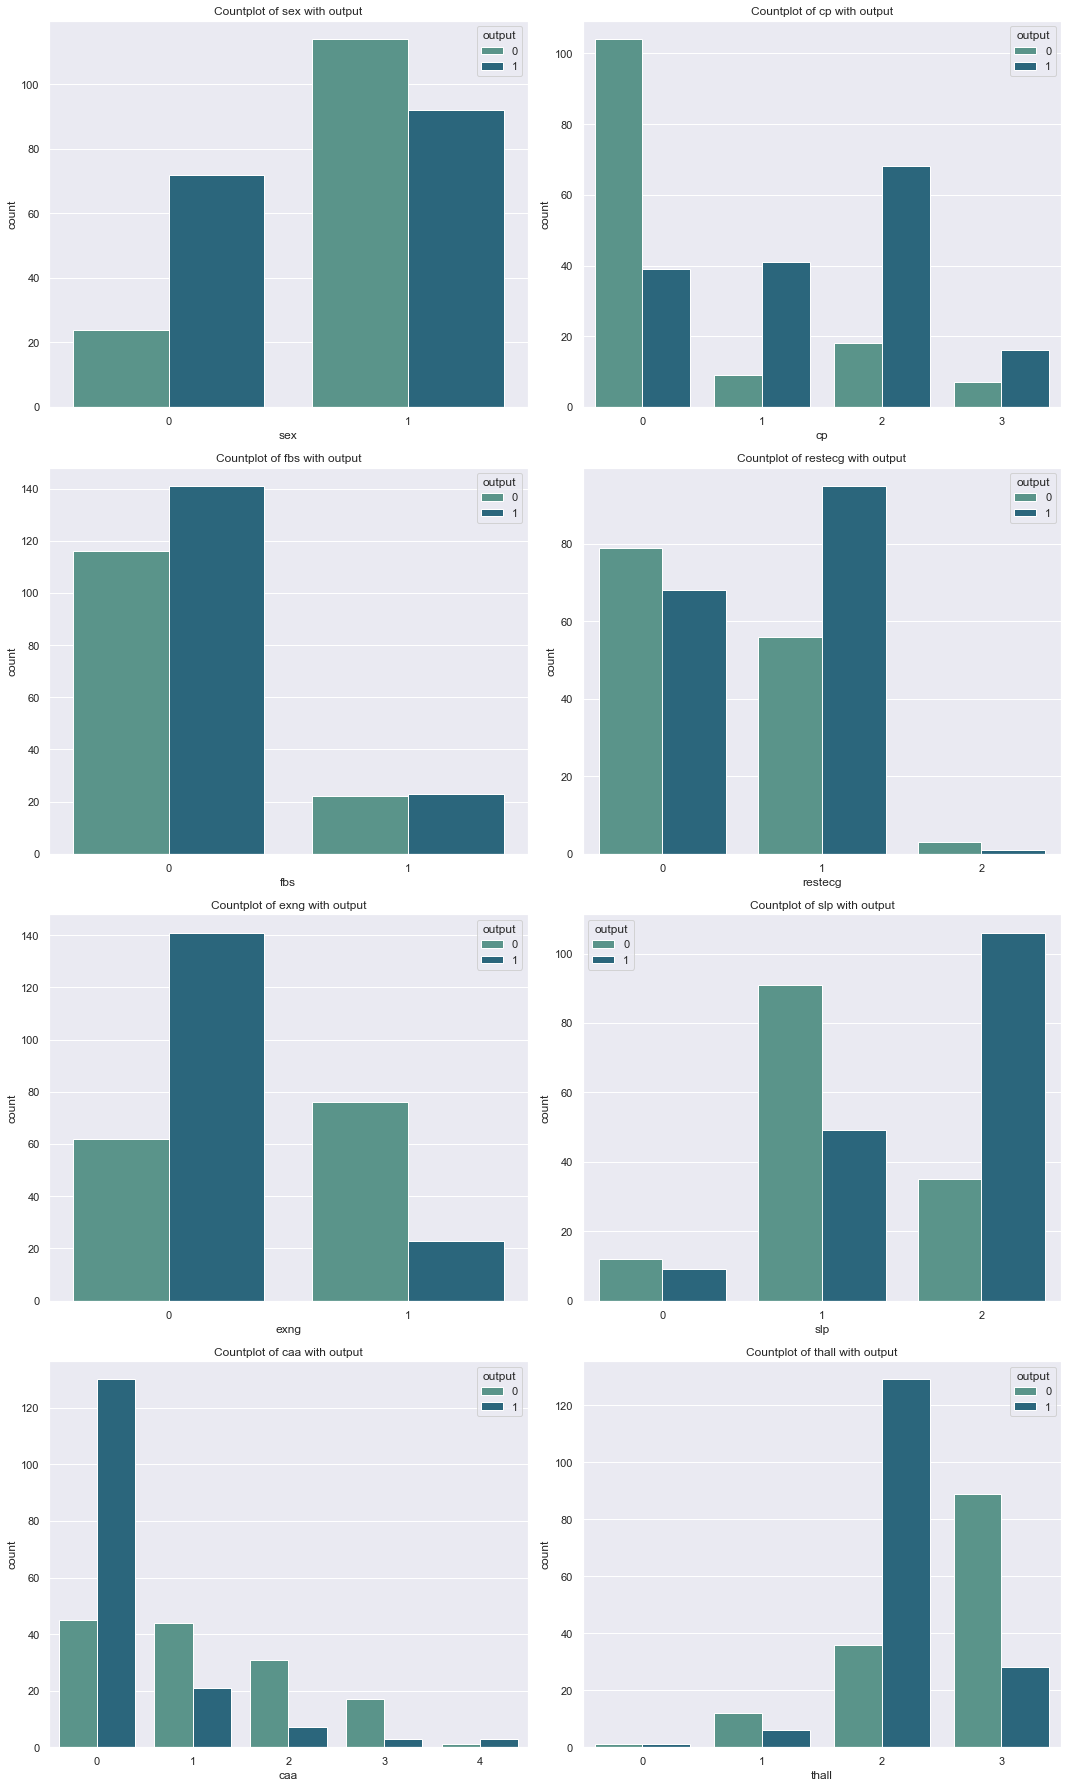

In [18]:
num_col = len(heart_df[cat_var].columns) - 1
num_rows = (num_col + 1) // 2

plt.figure(figsize=(15,25))

for i,column in enumerate(heart_df[cat_var]):
    plt.subplot(num_rows, 2, i+1)
    sns.countplot(x=column, data= heart_df, hue='output', palette= 'crest')
    plt.title(f'Countplot of {column} with output')

plt.tight_layout()
plt.show()

## Multivariate Analysis

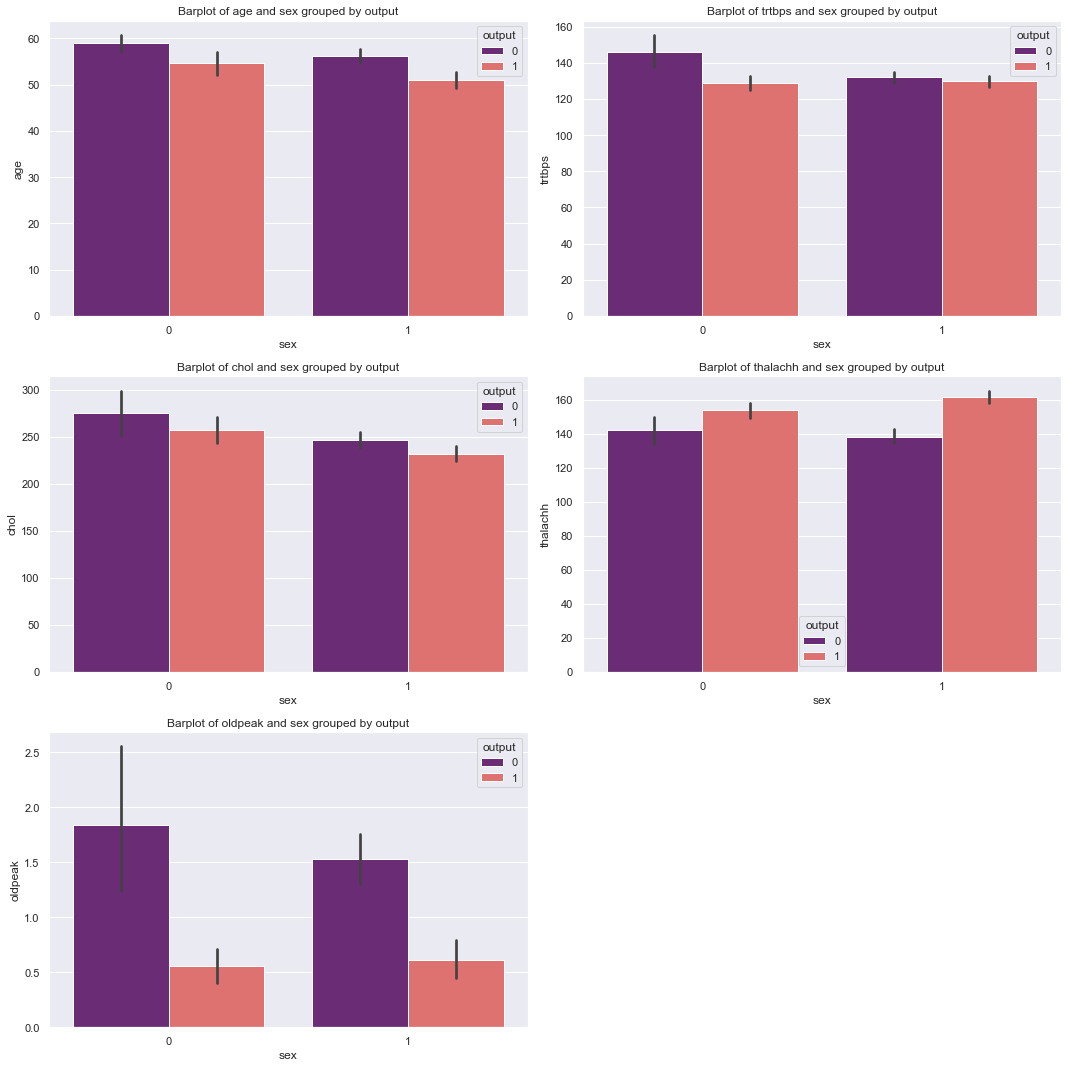

In [19]:
num_col = len(heart_df[num_var].columns)
num_rows = (num_col + 1) // 2

plt.figure(figsize=(15,15))

for i,column in enumerate(heart_df[num_var]):
    plt.subplot(num_rows, 2, i+1)
    sns.barplot(x='sex', y=column, data= heart_df, hue='output', palette= 'magma')
    plt.title(f'Barplot of {column} and sex grouped by output')

plt.tight_layout()
plt.show()

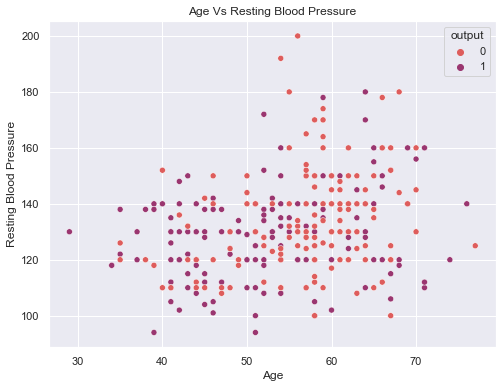

In [20]:
plt.figure(figsize=(8,6))

sns.scatterplot(x='age',y='trtbps',data=heart_df,hue='output',palette='flare')
plt.title('Age Vs Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

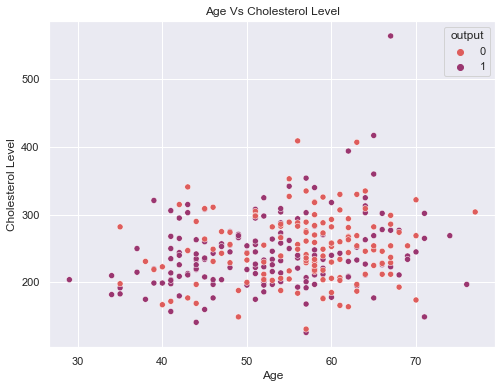

In [21]:
plt.figure(figsize=(8,6))

sns.scatterplot(x='age',y='chol',data=heart_df,hue='output',palette='flare')
plt.title('Age Vs Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()

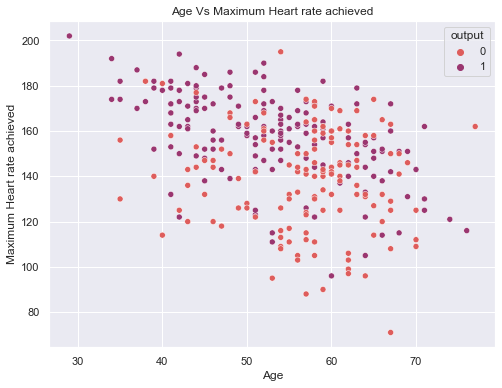

In [22]:
plt.figure(figsize=(8,6))

sns.scatterplot(x='age',y='thalachh',data=heart_df,hue='output',palette='flare')
plt.title('Age Vs Maximum Heart rate achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart rate achieved')
plt.show()

## Correlation Analysis

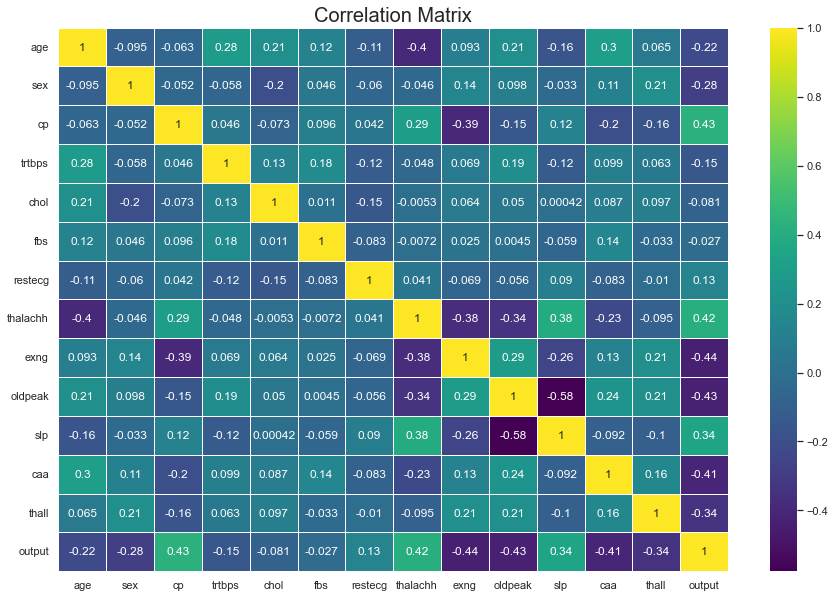

In [23]:
corr = heart_df.corr()

plt.figure(figsize=(15,10))

sns.heatmap(data = corr , linecolor='white', linewidths=1, annot=True, cmap = 'viridis')
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

**Note:**

    - 'cp','thalachh','slp' having 'positive' correlation with the 'output' variable.
    - 'restecg' has 'Weak Positive' correlation.
    - 'age','sex','trtbps','exng','oldpeak','caa','thall' are having 'negative' correlation with 'output' variable.
    - 'chol' and 'fbs' has 'No Correlation' with output variable.

### Drop columns having No correlation

In [24]:
heart_df = heart_df.drop(['chol','fbs'],axis=1)

In [25]:
heart_df.shape

(302, 12)

In [26]:
x = heart_df.drop('output',axis=1)
y = heart_df['output']

# Scaling Independent Variables

In [27]:
x.head()

,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,0,150,0,2.3,0,0,1
1,37,1,2,130,1,187,0,3.5,0,0,2
2,41,0,1,130,0,172,0,1.4,2,0,2
3,56,1,1,120,1,178,0,0.8,2,0,2
4,57,0,0,120,1,163,1,0.6,2,0,2


In [28]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [29]:
x_scaled

,age,sex,cp,trtbps,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.949794,0.682656,1.976470,0.764066,-1.002541,0.018826,-0.698344,1.084022,-2.271182,-0.714911,-2.147955
1,-1.928548,0.682656,1.005911,-0.091401,0.901657,1.636979,-0.698344,2.118926,-2.271182,-0.714911,-0.513994
2,-1.485726,-1.464866,0.035352,-0.091401,-1.002541,0.980971,-0.698344,0.307844,0.979514,-0.714911,-0.513994
3,0.174856,0.682656,0.035352,-0.661712,0.901657,1.243374,-0.698344,-0.209608,0.979514,-0.714911,-0.513994
4,0.285561,-1.464866,-0.935208,-0.661712,0.901657,0.587366,1.431958,-0.382092,0.979514,-0.714911,-0.513994
...,...,...,...,...,...,...,...,...,...,...,...
297,0.285561,-1.464866,-0.935208,0.478910,0.901657,-1.161988,1.431958,-0.727060,-0.645834,-0.714911,1.119967
298,-1.042904,0.682656,1.976470,-1.232023,0.901657,-0.768384,-0.698344,0.135360,-0.645834,-0.714911,1.119967
299,1.503322,0.682656,-0.935208,0.707035,0.901657,-0.374779,-0.698344,2.032684,-0.645834,1.274980,1.119967
300,0.285561,0.682656,-0.935208,-0.091401,0.901657,-1.511859,1.431958,0.135360,-0.645834,0.280034,1.119967


## Split the Data into Train and Test

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(241, 11) (61, 11) (241,) (61,)


# Model Building

## Model.1: Logistic Regression

In [32]:
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [33]:
# Prediction
y_pred_lr_tr = logit_model.predict(x_train)
y_pred_lr_tst = logit_model.predict(x_test)

# Evaluation
con_mat_lr = confusion_matrix(y_test,y_pred_lr_tst)
cls_rpt_lr = classification_report(y_test,y_pred_lr_tst)
print('Confution Matrix')
print(con_mat_lr)
print('\n')
print('Classification Report')
print(cls_rpt_lr)
acc_sc_lr = accuracy_score(y_test,y_pred_lr_tst)
print('Training Accuracy:',accuracy_score(y_train,y_pred_lr_tr))
print('Test Accuracy:',accuracy_score(y_test,y_pred_lr_tst))

Confution Matrix
[[19  9]
 [ 2 31]]


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

Training Accuracy: 0.8547717842323651
Test Accuracy: 0.819672131147541


ROC_AUC_Score: 0.808982683982684


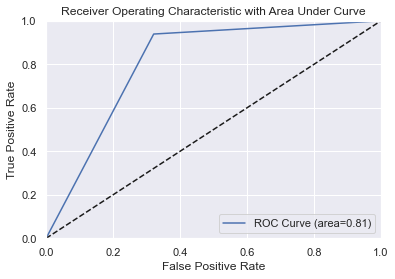

In [34]:
# ROC - AUC
roc_auc_lr = roc_auc_score(y_test,y_pred_lr_tst)
print('ROC_AUC_Score:',roc_auc_lr)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr_tst)

plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %roc_auc_lr)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## Model.2: Decision Tree Classifier

In [35]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [36]:
# Prediction
y_pred_dt_tr = dt.predict(x_train)
y_pred_dt_tst = dt.predict(x_test)

# Evaluation
con_mat_dt = confusion_matrix(y_test,y_pred_dt_tst)
cls_rpt_dt = classification_report(y_test,y_pred_dt_tst)
print('Confution Matrix')
print(con_mat_dt)
print('\n')
print('Classification Report')
print(cls_rpt_dt)
acc_sc_dt = accuracy_score(y_test,y_pred_dt_tst)
print('Training Accuracy:',accuracy_score(y_train,y_pred_dt_tr))
print('Test Accuracy:',accuracy_score(y_test,y_pred_dt_tst))

Confution Matrix
[[17 11]
 [ 1 32]]


Classification Report
              precision    recall  f1-score   support

           0       0.94      0.61      0.74        28
           1       0.74      0.97      0.84        33

    accuracy                           0.80        61
   macro avg       0.84      0.79      0.79        61
weighted avg       0.84      0.80      0.79        61

Training Accuracy: 0.9253112033195021
Test Accuracy: 0.8032786885245902


ROC_AUC_Score: 0.7884199134199135


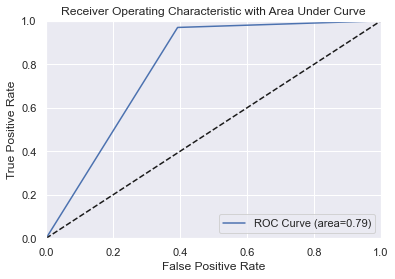

In [37]:
# ROC - AUC
roc_auc_dt = roc_auc_score(y_test,y_pred_dt_tst)
print('ROC_AUC_Score:',roc_auc_dt)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt_tst)

plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %roc_auc_dt)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

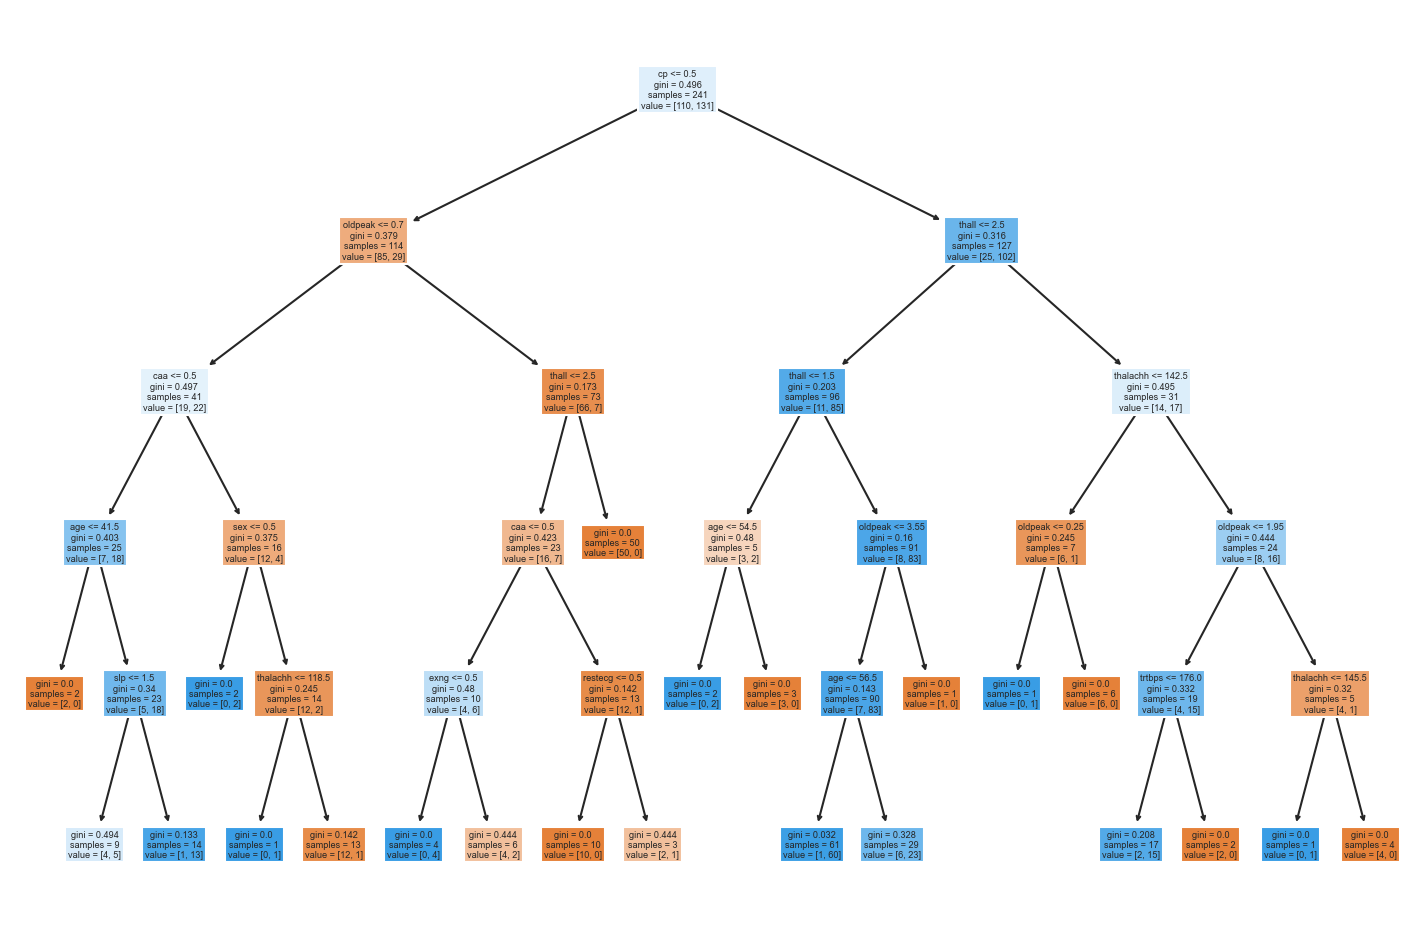

In [38]:
# Plot Tree
plt.figure(figsize=(12,8), dpi=150)
plot_tree(dt, feature_names=x.columns, filled=True)
plt.show()

## Model.3: RandomForest Classifier

In [39]:
rf = RandomForestClassifier(n_estimators=150,max_depth=5,random_state=42,oob_score=True)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=150, oob_score=True,
                       random_state=42)

In [40]:
# Prediction
y_pred_rf_tr = rf.predict(x_train)
y_pred_rf_tst = rf.predict(x_test)

# Evaluation
con_mat_rf = confusion_matrix(y_test,y_pred_rf_tst)
cls_rpt_rf = classification_report(y_test,y_pred_rf_tst)
print('Confution Matrix')
print(con_mat_rf)
print('\n')
print('Classification Report')
print(cls_rpt_rf)
acc_sc_rf = accuracy_score(y_test,y_pred_rf_tst)
print('Training Accuracy:',accuracy_score(y_train,y_pred_rf_tr))
print('Test Accuracy:',accuracy_score(y_test,y_pred_rf_tst))

Confution Matrix
[[19  9]
 [ 2 31]]


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

Training Accuracy: 0.941908713692946
Test Accuracy: 0.819672131147541


ROC_AUC_Score: 0.808982683982684


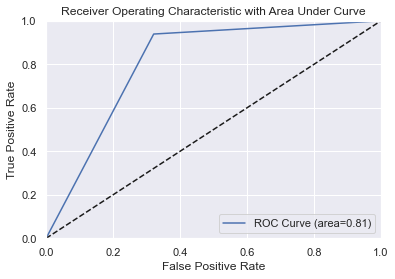

In [41]:
# ROC - AUC
roc_auc_rf = roc_auc_score(y_test,y_pred_rf_tst)
print('ROC_AUC_Score:',roc_auc_rf)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_tst)

plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %roc_auc_rf)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## Model.4: Gradient Boosting Classifier

In [42]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [43]:
# Prediction
y_pred_gb_tr = gb.predict(x_train)
y_pred_gb_tst = gb.predict(x_test)

# Evaluation
con_mat_gb = confusion_matrix(y_test,y_pred_gb_tst)
cls_rpt_gb = classification_report(y_test,y_pred_gb_tst)
print('Confution Matrix')
print(con_mat_gb)
print('\n')
print('Classification Report')
print(cls_rpt_gb)
acc_sc_gb = accuracy_score(y_test,y_pred_gb_tst)
print('Training Accuracy:',accuracy_score(y_train,y_pred_gb_tr))
print('Test Accuracy:',accuracy_score(y_test,y_pred_gb_tst))

Confution Matrix
[[19  9]
 [ 2 31]]


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61

Training Accuracy: 0.991701244813278
Test Accuracy: 0.819672131147541


ROC_AUC_Score: 0.808982683982684


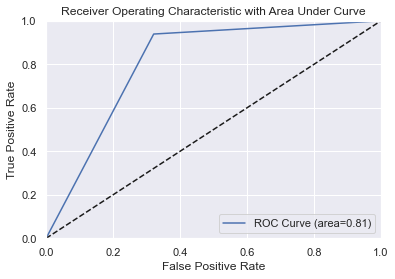

In [44]:
# ROC - AUC
roc_auc_gb = roc_auc_score(y_test,y_pred_gb_tst)
print('ROC_AUC_Score:',roc_auc_gb)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb_tst)

plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %roc_auc_gb)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## Model.5: AdaBoosting Classifier

In [45]:
adb = AdaBoostClassifier(random_state=42)
adb.fit(x_train,y_train)

AdaBoostClassifier(random_state=42)

In [46]:
# Prediction
y_pred_adb_tr = adb.predict(x_train)
y_pred_adb_tst = adb.predict(x_test)

# Evaluation
con_mat_adb = confusion_matrix(y_test,y_pred_adb_tst)
cls_rpt_adb = classification_report(y_test,y_pred_adb_tst)
print('Confution Matrix')
print(con_mat_adb)
print('\n')
print('Classification Report')
print(cls_rpt_adb)
acc_sc_adb = accuracy_score(y_test,y_pred_adb_tst)
print('Training Accuracy:',accuracy_score(y_train,y_pred_adb_tr))
print('Test Accuracy:',accuracy_score(y_test,y_pred_adb_tst))

Confution Matrix
[[21  7]
 [ 3 30]]


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61

Training Accuracy: 0.8962655601659751
Test Accuracy: 0.8360655737704918


ROC_AUC_Score: 0.8295454545454546


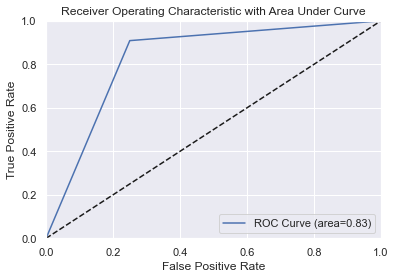

In [47]:
# ROC - AUC
roc_auc_adb = roc_auc_score(y_test,y_pred_adb_tst)
print('ROC_AUC_Score:',roc_auc_adb)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_adb_tst)

plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %roc_auc_adb)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## Model.6: XGBoost Classifier

In [48]:
xgb = XGBClassifier(n_estimators=100,learning_rate=0.01,random_state=42,max_depth=5)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [49]:
# Prediction
y_pred_xgb_tr = xgb.predict(x_train)
y_pred_xgb_tst = xgb.predict(x_test)

# Evaluation
con_mat_xgb = confusion_matrix(y_test,y_pred_xgb_tst)
cls_rpt_xgb = classification_report(y_test,y_pred_xgb_tst)
print('Confution Matrix')
print(con_mat_xgb)
print('\n')
print('Classification Report')
print(cls_rpt_xgb)
acc_sc_xgb = accuracy_score(y_test,y_pred_xgb_tst)
print('Training Accuracy:',accuracy_score(y_train,y_pred_xgb_tr))
print('Test Accuracy:',accuracy_score(y_test,y_pred_xgb_tst))

Confution Matrix
[[19  9]
 [ 0 33]]


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        28
           1       0.79      1.00      0.88        33

    accuracy                           0.85        61
   macro avg       0.89      0.84      0.84        61
weighted avg       0.88      0.85      0.85        61

Training Accuracy: 0.91701244813278
Test Accuracy: 0.8524590163934426


ROC_AUC_Score: 0.8392857142857143


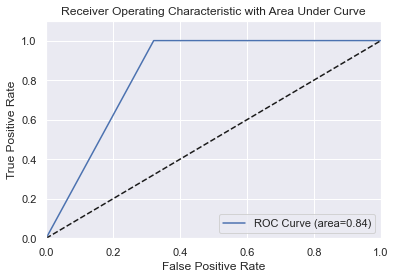

In [50]:
# ROC - AUC
roc_auc_xgb = roc_auc_score(y_test,y_pred_xgb_tst)
print('ROC_AUC_Score:',roc_auc_xgb)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_tst)

plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %roc_auc_xgb)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## Model.7: Support Vector Machine

In [51]:
svm = SVC(kernel='linear',random_state=42)
svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [52]:
# Prediction
y_pred_svm_tr = svm.predict(x_train)
y_pred_svm_tst = svm.predict(x_test)

# Evaluation
con_mat_svm = confusion_matrix(y_test,y_pred_svm_tst)
cls_rpt_svm = classification_report(y_test,y_pred_svm_tst)
print('Confution Matrix')
print(con_mat_svm)
print('\n')
print('Classification Report')
print(cls_rpt_svm)
acc_sc_svm = accuracy_score(y_test,y_pred_svm_tst)
print('Training Accuracy:',accuracy_score(y_train,y_pred_svm_tr))
print('Test Accuracy:',accuracy_score(y_test,y_pred_svm_tst))

Confution Matrix
[[18 10]
 [ 3 30]]


Classification Report
              precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61

Training Accuracy: 0.8672199170124482
Test Accuracy: 0.7868852459016393


ROC_AUC_Score: 0.775974025974026


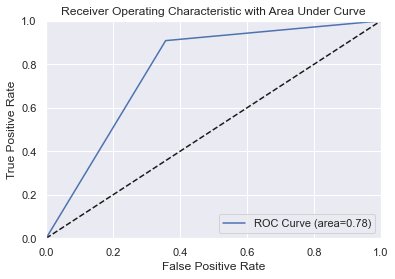

In [53]:
# ROC - AUC
roc_auc_svm = roc_auc_score(y_test,y_pred_svm_tst)
print('ROC_AUC_Score:',roc_auc_svm)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_tst)

plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %roc_auc_svm)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## Model.8: K-Nearest Neighbors Classifier(KNN)

In [54]:
# Find best K-Optimum value using error_rate and elbow method

error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred !=y_test))

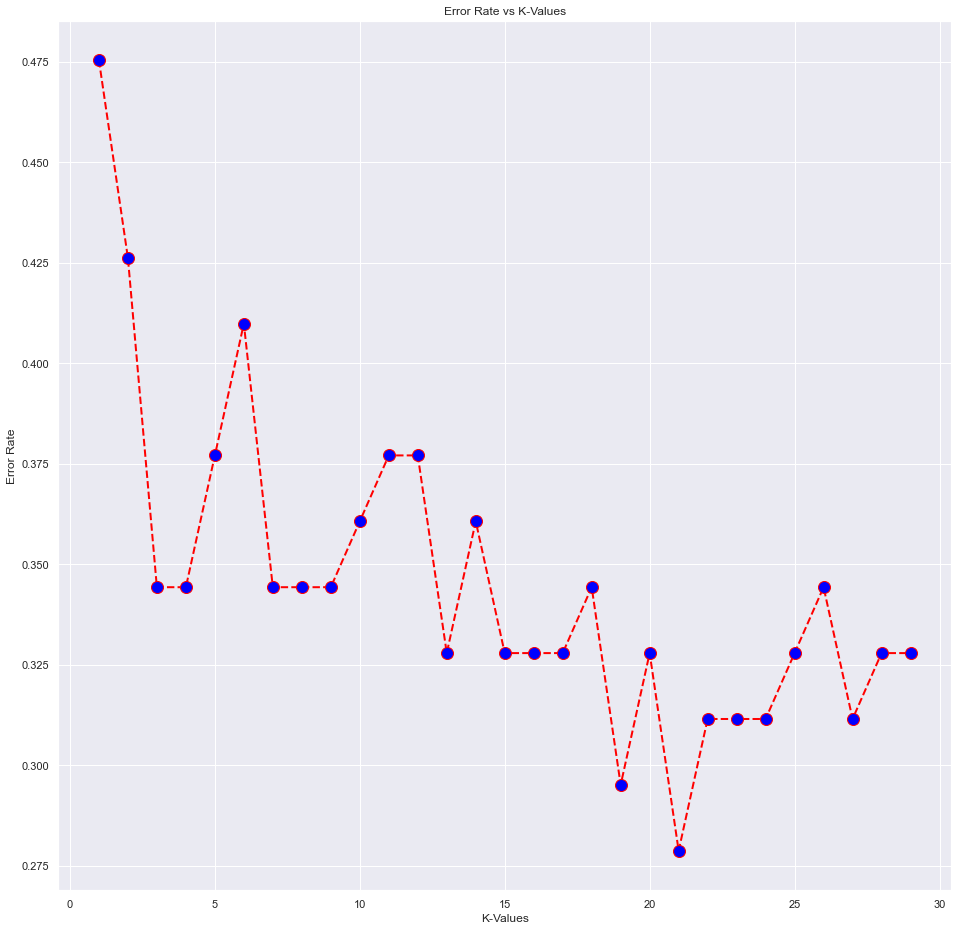

In [55]:
plt.figure(figsize=(16,16))
plt.plot(range(1,30),error_rate, color='red', linestyle ='dashed',
        linewidth=2, markersize=12, marker='o', markerfacecolor='blue')
plt.title("Error Rate vs K-Values")
plt.xlabel("K-Values")
plt.ylabel("Error Rate")
plt.show()

In [56]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [57]:
# Prediction
y_pred_knn_tr = knn.predict(x_train)
y_pred_knn_tst = knn.predict(x_test)

# Evaluation
con_mat_knn = confusion_matrix(y_test,y_pred_knn_tst)
cls_rpt_knn = classification_report(y_test,y_pred_knn_tst)
print('Confution Matrix')
print(con_mat_knn)
print('\n')
print('Classification Report')
print(cls_rpt_knn)
acc_sc_knn = accuracy_score(y_test,y_pred_knn_tst)
print('Training Accuracy:',accuracy_score(y_train,y_pred_knn_tr))
print('Test Accuracy:',accuracy_score(y_test,y_pred_knn_tst))

Confution Matrix
[[18 10]
 [11 22]]


Classification Report
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        28
           1       0.69      0.67      0.68        33

    accuracy                           0.66        61
   macro avg       0.65      0.65      0.65        61
weighted avg       0.66      0.66      0.66        61

Training Accuracy: 0.7302904564315352
Test Accuracy: 0.6557377049180327


ROC_AUC_Score: 0.6547619047619047


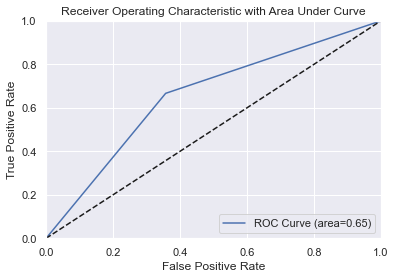

In [58]:
# ROC - AUC
roc_auc_knn = roc_auc_score(y_test,y_pred_knn_tst)
print('ROC_AUC_Score:',roc_auc_knn)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_tst)

plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %roc_auc_knn)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

## Model.9: Naive Bayes Theorem

In [59]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [60]:
# Prediction
y_pred_nb_tr = nb.predict(x_train)
y_pred_nb_tst = nb.predict(x_test)

# Evaluation
con_mat_nb = confusion_matrix(y_test,y_pred_nb_tst)
cls_rpt_nb = classification_report(y_test,y_pred_nb_tst)
print('Confution Matrix')
print(con_mat_nb)
print('\n')
print('Classification Report')
print(cls_rpt_nb)
acc_sc_nb = accuracy_score(y_test,y_pred_nb_tst)
print('Training Accuracy:',accuracy_score(y_train,y_pred_nb_tr))
print('Test Accuracy:',accuracy_score(y_test,y_pred_nb_tst))

Confution Matrix
[[20  8]
 [ 2 31]]


Classification Report
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61

Training Accuracy: 0.8547717842323651
Test Accuracy: 0.8360655737704918


ROC_AUC_Score: 0.8268398268398269


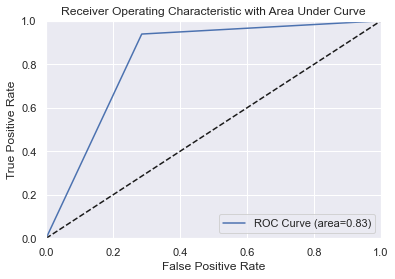

In [61]:
# ROC - AUC
roc_auc_nb = roc_auc_score(y_test,y_pred_nb_tst)
print('ROC_AUC_Score:',roc_auc_nb)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb_tst)

plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %roc_auc_nb)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

# Comparing Models

In [62]:
model_df = pd.DataFrame({'Model': ['Logistic Regression',
                                   'Decision Tree Classifier',
                                   'Random Forest Classifier',
                                   'Gradient Boosting Classifier', 
                                   'AdaBoosting',
                                   'XGBoost',
                                   'Support Vector Machine',
                                   'K-Nearest Neighbors',
                                   'Naive Bayes Theorem'],
                         'Accuracy': [acc_sc_lr,acc_sc_dt,acc_sc_rf,acc_sc_gb,acc_sc_adb,acc_sc_xgb,acc_sc_svm,acc_sc_knn,
                                     acc_sc_nb]})

In [63]:
model_df.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
5,XGBoost,0.852459
4,AdaBoosting,0.836066
8,Naive Bayes Theorem,0.836066
0,Logistic Regression,0.819672
2,Random Forest Classifier,0.819672
3,Gradient Boosting Classifier,0.819672
1,Decision Tree Classifier,0.803279
6,Support Vector Machine,0.786885
7,K-Nearest Neighbors,0.655738


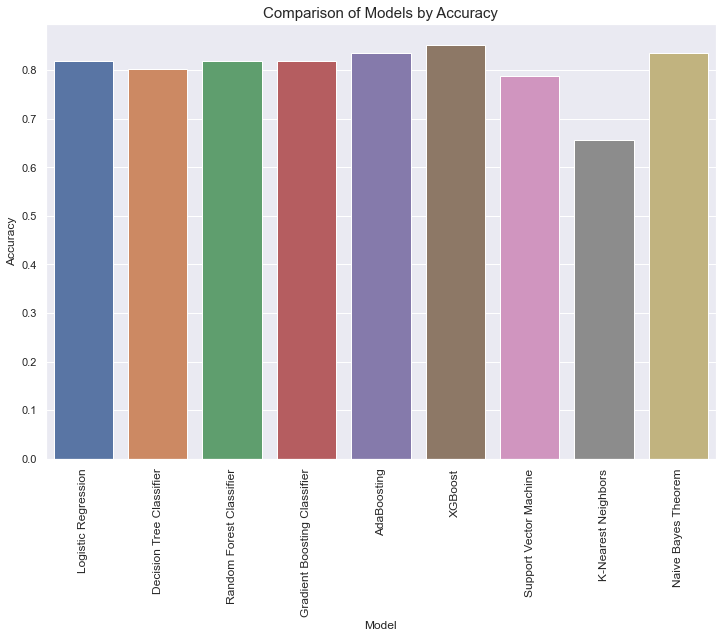

In [64]:
plt.figure(figsize=(12,8))
sns.barplot(x = model_df['Model'], y = model_df['Accuracy'])
plt.title('Comparison of Models by Accuracy', size=15)
plt.xticks(rotation=90, size=12)
plt.show()

# Hyperparameter Tuning

## GridSearchCv

In [65]:
xgb = XGBClassifier(random_state=42)

params = {'n_estimators': [100,150,200],
          'learning_rate':[0.1,0.01,0.001],
          'max_depth': [5,10,20],
          'max_leaves':[5,10,15]}

grid_search = GridSearchCV(xgb, params, scoring='accuracy', cv=10, n_jobs=-1, verbose=4)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [66]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'max_leaves': 5, 'n_estimators': 100}

In [67]:
grid_search.best_score_

0.7883333333333333

In [68]:
xgb_best = grid_search.best_estimator_
y_pred = xgb_best.predict(x_test)

print('Accuracy:',accuracy_score(y_test,y_pred))

Accuracy: 0.8524590163934426


# Feature Importance

In [69]:
feature_importance = pd.DataFrame({'Feature': x.columns, 
                        'Importance': xgb_best.feature_importances_}).sort_values(by='Importance',ascending=False)

feature_importance

,Feature,Importance
2,cp,0.585167
7,oldpeak,0.087637
9,caa,0.076140
10,thall,0.070613
6,exng,0.048947
0,age,0.028287
1,sex,0.027116
5,thalachh,0.021952
3,trtbps,0.019606
8,slp,0.019091


Text(0.5, 1.0, 'Feature Importance of XGBoost')

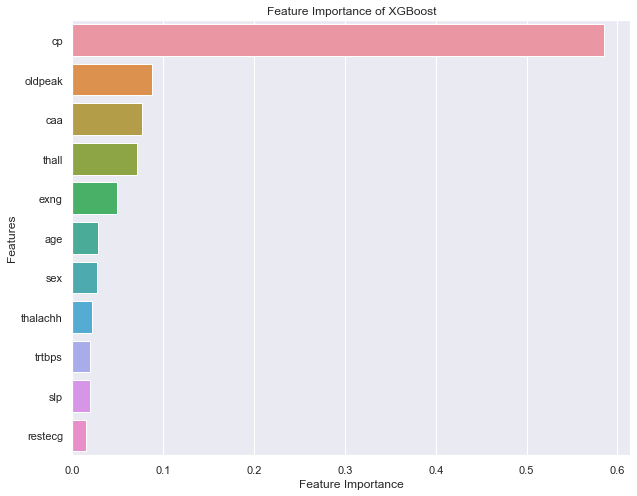

In [70]:
# Plotting Feature Importance
fig = plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance['Importance'],y=feature_importance['Feature'])
plt.ylabel('Features')
plt.xlabel('Feature Importance')
plt.title('Feature Importance of XGBoost')